c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8441 - loss: 0.8751 - val_accuracy: 0.8662 - val_loss: 1.0344
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.8846 - loss: 0.9145 - val_accuracy: 0.8734 - val_loss: 1.1324
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8909 - loss: 0.9339 - val_accuracy: 0.8933 - val_loss: 1.0072
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.8922 - loss: 0.9322 - val_accuracy: 0.8944 - val_loss: 1.0579
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.8965 - loss: 0.9237 - val_accuracy: 0.8938 - val_loss: 1.0629
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.8962 - loss: 0.9596 - val_accuracy: 0.8767 - val_loss: 1.3770
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.8971 - loss: 0.9860 - val_accuracy: 0.8943 - val_loss: 1.1853
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8973 - l

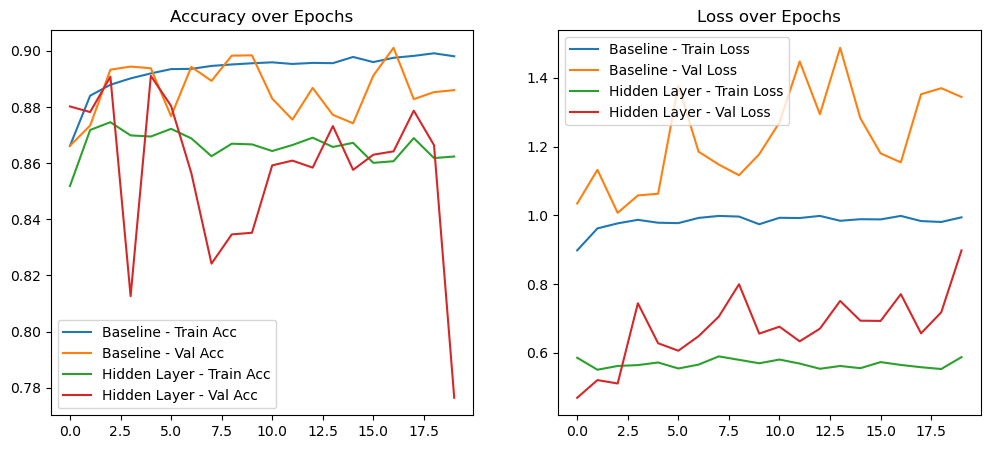

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

def create_baseline_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation='softmax', input_shape=(784,))
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_hidden_layer_model():
    model = keras.Sequential([
        keras.layers.Dense(50, activation='relu', input_shape=(784,)), 
        keras.layers.Dense(10, activation='softmax') 
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = create_baseline_model()
history_baseline = baseline_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

hidden_layer_model = create_hidden_layer_model()
history_hidden = hidden_layer_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['accuracy'], label='Baseline - Train Acc')
plt.plot(history_baseline.history['val_accuracy'], label='Baseline - Val Acc')
plt.plot(history_hidden.history['accuracy'], label='Hidden Layer - Train Acc')
plt.plot(history_hidden.history['val_accuracy'], label='Hidden Layer - Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['loss'], label='Baseline - Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Baseline - Val Loss')
plt.plot(history_hidden.history['loss'], label='Hidden Layer - Train Loss')
plt.plot(history_hidden.history['val_loss'], label='Hidden Layer - Val Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()
